# <center>AI SATURDAYS DONOSTIA 2020<center>
    
## <center>Regresión Indicador "DeprRate" (Índice de Depresión)</center>
    
## <center>Proyecto Práctico Equipo FACEMOOD</center>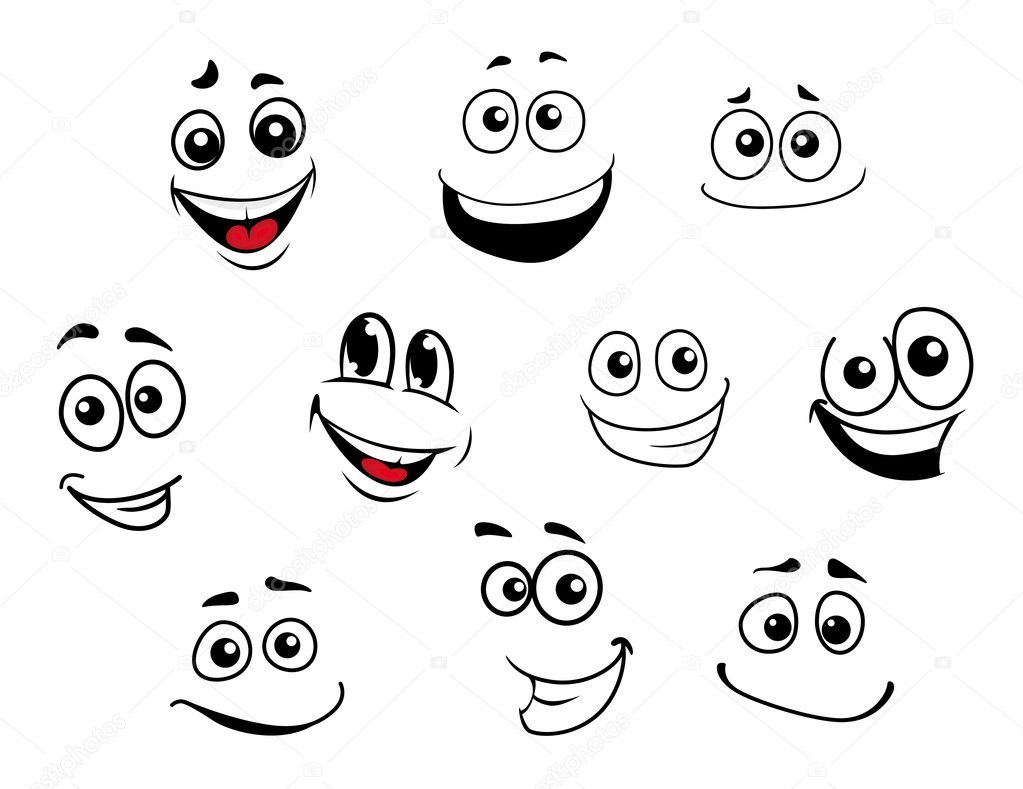    


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from regresion_functions import *
%load_ext autoreload
%autoreload 2

### Conjunto de Datos Original

In [2]:
df = pd.read_csv('../processed-data/tidy_socialmedia_data.csv', index_col=0)
df.drop('full_count', axis=1, inplace=True)
df.head()

,Participant,Date,Day,Time,Session.Name,Notification.No,LifePak.Download.No,Responded,Completed.Session,Session.Instance,...,LowMood,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress,PSMU,News,ASMU
1,115091,2017-05-02,Tuesday,10:00:06,Daily questions,1,1,1,1,1.0,...,55.0,61.0,64.0,68.0,50.0,56.0,73.0,66.0,39.0,38.0
2,115091,2017-05-02,Tuesday,12:02:48,Daily questions,2,1,1,1,2.0,...,59.0,57.0,70.0,58.0,37.0,56.0,67.0,0.0,27.0,23.0
3,115091,2017-05-02,Tuesday,14:03:02,Daily questions,3,1,1,1,3.0,...,20.0,44.0,70.0,67.0,26.0,38.0,39.0,63.0,34.0,36.0
4,115091,2017-05-02,Tuesday,16:34:28,Daily questions,4,1,1,1,4.0,...,25.0,56.0,79.0,89.0,30.0,20.0,60.0,67.0,29.0,23.0
6,115091,2017-05-02,Tuesday,20:02:12,Daily questions,6,1,1,1,5.0,...,22.0,0.0,27.0,83.0,15.0,3.0,25.0,16.0,0.0,0.0


### Creación Índice de Depresión

In [3]:
df["DeprRate"]=(df["LowMood"]+df["LossOfInt"]+df["Hopeless"])/3
df.head()

,Participant,Date,Day,Time,Session.Name,Notification.No,LifePak.Download.No,Responded,Completed.Session,Session.Instance,...,Loneliness,Concentrat,LossOfInt,Inferior,Hopeless,Stress,PSMU,News,ASMU,DeprRate
1,115091,2017-05-02,Tuesday,10:00:06,Daily questions,1,1,1,1,1.0,...,61.0,64.0,68.0,50.0,56.0,73.0,66.0,39.0,38.0,59.666667
2,115091,2017-05-02,Tuesday,12:02:48,Daily questions,2,1,1,1,2.0,...,57.0,70.0,58.0,37.0,56.0,67.0,0.0,27.0,23.0,57.666667
3,115091,2017-05-02,Tuesday,14:03:02,Daily questions,3,1,1,1,3.0,...,44.0,70.0,67.0,26.0,38.0,39.0,63.0,34.0,36.0,41.666667
4,115091,2017-05-02,Tuesday,16:34:28,Daily questions,4,1,1,1,4.0,...,56.0,79.0,89.0,30.0,20.0,60.0,67.0,29.0,23.0,44.666667
6,115091,2017-05-02,Tuesday,20:02:12,Daily questions,6,1,1,1,5.0,...,0.0,27.0,83.0,15.0,3.0,25.0,16.0,0.0,0.0,36.000000


### Nuevo Conjunto de Datos

In [4]:
df2 = df[["Participant","ASMU", "News", "PSMU", "Stress", "Inferior", "Concentrat", "Loneliness", "Fatigue", "DeprRate"]]
print(df2.head())
print("No. Filas/Columnas del Conjunto de Datos: {}".format(df2.shape))

   Participant  ASMU  News  PSMU  Stress  Inferior  Concentrat  Loneliness  \
1       115091  38.0  39.0  66.0    73.0      50.0        64.0        61.0   
2       115091  23.0  27.0   0.0    67.0      37.0        70.0        57.0   
3       115091  36.0  34.0  63.0    39.0      26.0        70.0        44.0   
4       115091  23.0  29.0  67.0    60.0      30.0        79.0        56.0   
6       115091   0.0   0.0  16.0    25.0      15.0        27.0         0.0   

   Fatigue   DeprRate  
1     61.0  59.666667  
2     28.0  57.666667  
3     24.0  41.666667  
4     63.0  44.666667  
6     16.0  36.000000  
No. Filas/Columnas del Conjunto de Datos: (8687, 10)


### Estadísticas descriptivas

In [5]:
df2_2 = df[["ASMU", "News", "PSMU", "Stress", "Inferior", "Concentrat", "Loneliness", "Fatigue", "DeprRate"]]
df2_2.describe()

,ASMU,News,PSMU,Stress,Inferior,Concentrat,Loneliness,Fatigue,DeprRate
count,8645.000000,8647.000000,8644.000000,8648.000000,8646.000000,8643.000000,8646.000000,8652.000000,8640.000000
mean,21.410642,20.804788,31.604350,20.639801,10.583854,26.389795,11.971085,36.987171,16.894985
std,25.321793,24.890481,29.214782,23.184786,15.485521,26.086166,16.962882,29.717460,16.338016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,10.000000,2.666667
50%,12.000000,12.000000,24.000000,14.000000,3.000000,19.000000,5.000000,30.000000,13.333333
75%,33.000000,31.000000,61.000000,30.000000,17.000000,45.000000,18.000000,64.000000,25.666667
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000


### Medias por Participante

In [6]:
dfmean=df2.groupby('Participant').mean()
print(dfmean.head())
print("No. Filas/Columnas del Conjunto de Datos: {}".format(dfmean.shape))

                  ASMU       News       PSMU     Stress   Inferior  \
Participant                                                          
115091       16.792208  15.012987  32.883117  37.441558  17.831169   
131183       28.254237  11.593220  45.203390  16.898305   0.254237   
438907       27.040816  34.645833  44.595745  25.000000  23.395833   
515070       37.826923  38.576923  25.711538  17.365385  11.403846   
572172       40.545455  45.250000  36.852273  20.511364  38.056818   

             Concentrat  Loneliness    Fatigue   DeprRate  
Participant                                                
115091        37.272727   23.285714  45.155844  29.839827  
131183        19.508475    0.389831  36.288136   6.129944  
438907        35.729167   21.833333  51.040816  30.619048  
515070        32.903846   14.076923  34.865385  13.076923  
572172        14.352273    9.375000  18.272727  17.977273  
No. Filas/Columnas del Conjunto de Datos: (125, 9)


### Estadísticas descriptivas de las medias por participante

In [7]:
dfmean.describe()

,ASMU,News,PSMU,Stress,Inferior,Concentrat,Loneliness,Fatigue,DeprRate
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,21.265517,20.329226,31.265974,20.555942,10.360674,26.568285,11.900892,37.066547,16.683777
std,15.387645,15.665447,14.071410,14.524215,10.527341,14.376593,11.066729,17.373640,10.882707
min,0.314815,0.308642,3.342857,0.180556,0.000000,0.474359,0.000000,0.802469,0.293860
25%,9.189189,6.705882,21.041667,8.222222,1.319149,15.574713,2.176471,24.202532,8.113924
50%,20.867647,16.566265,30.159420,19.634921,6.448276,25.810127,9.140625,38.150000,16.159204
75%,28.971831,31.017241,38.915493,32.277108,17.231884,35.333333,19.063492,49.244186,23.976190
max,77.863636,72.393939,75.413043,61.482353,52.658824,70.562500,53.788235,78.378947,51.952941


### Diagrama de Matriz para las Medias de las 9 Variables

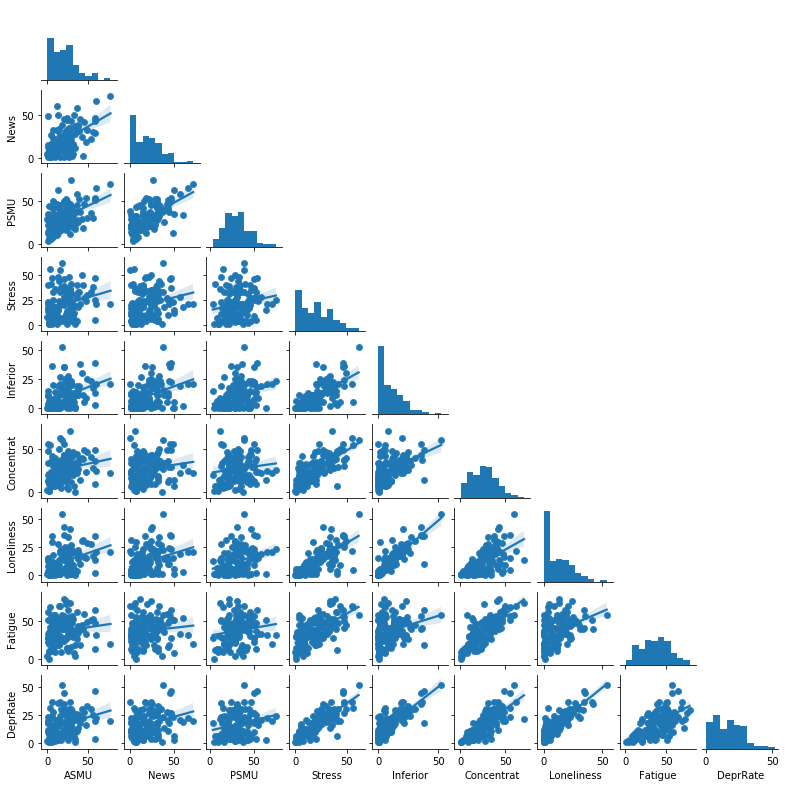

In [8]:
printMatrixDiagram(dfmean)   # Función definida en "regresion_functions"

### Correlaciones de Pearson para las Medias de las 9 Variables

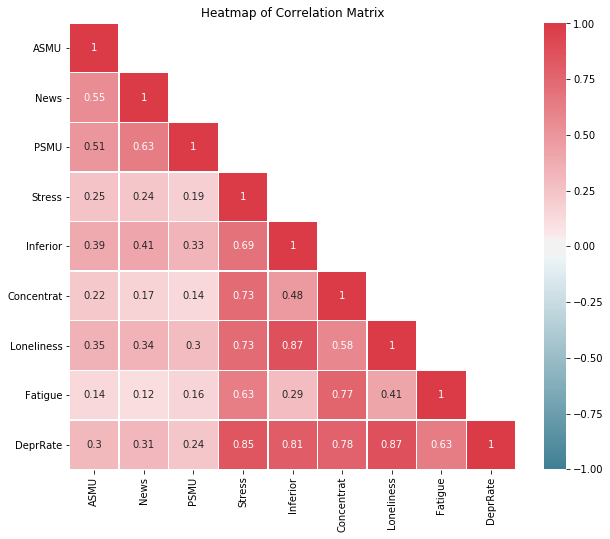

In [9]:
printPearsonCorrelations(dfmean)   # Función definida en "regresion_functions"

### Se observan correlaciones más significativas entre las siguientes variables:

DeprRate vs Loneliness

DeprRate vs Inferior

DeprRate vs Stress

Loneliness vs Inferior


No se observa "multicolinealidad"

### Regresión Lineal para las Medias: y = DeprRate, X = Demás Variables

In [10]:
label = dfmean.DeprRate

dfmean.drop('DeprRate', axis=1, inplace=True)

### Proceso de eliminación de variables X que no contribuyen significativamente para explicar y

In [11]:
resultsummary = pd.DataFrame(data={'iteration': [], 'intercept': [], 'RMSE_Training': [], 'RMSE_Testing': [],
                                   'R2_Training': [],'R2_Testing': [],'p_value_max':[],'removed_var':[]})

data_list_medias = calculateRegression(dfmean, label, resultsummary, alpha=0.15)   # Función definida en "regresion_functions"

   iteration  intercept  RMSE_Training  RMSE_Testing  R2_Training  R2_Testing  \
0        0.0      1.120          3.147         3.603        0.912       0.906   
1        1.0      0.981          3.162         3.544        0.911       0.909   
2        2.0      0.904          3.180         3.509        0.910       0.911   
3        3.0     -0.025          3.215         3.463        0.908       0.913   

   p_value_max removed_var  
0        0.431        ASMU  
1        0.354        News  
2        0.254        PSMU  
3        0.048           -  

Modelo Final
['Stress', 'Inferior', 'Concentrat', 'Loneliness', 'Fatigue']
[0.15386817 0.24959075 0.19015895 0.30838329 0.05943105] -0.024589409378897642
RMSE of Linear Regression Model with Training Data: 3.22
RMSE of Linear Regression Model with Testing Data: 3.46
R2 Coefficient for Linear Regression Model with Training Data: 0.908
R2 Coefficient for Linear Regression Model with Testing Data: 0.913


### Análisis de Residuos Modelo Final

Estadística prueba normalidad Kolmogorov-Smirnov=0.090, pvalue=0.368

Probablemente Normal


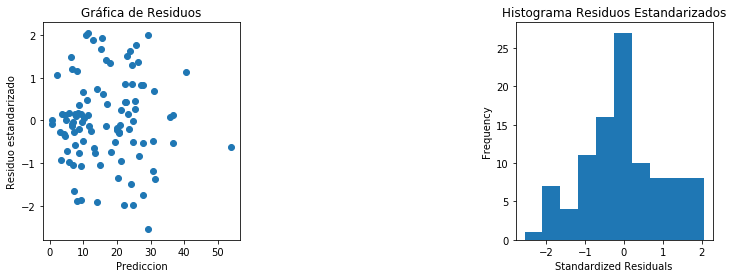

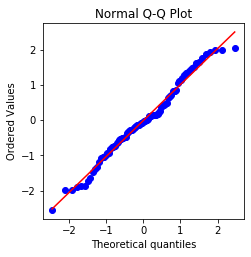

In [12]:
fitt = data_list_medias[5]
standardized_residuals = data_list_medias[4]

residualAnalysis(fitt, standardized_residuals)   # Función definida en "regresion_functions"

## Conclusión Final Modelo Ajustado (y = DeprRate)
####  
### El coeficiente de determinación (R2) del modelo ajustado para las "medias" es alto (90,8%).
### Como el Análisis de Residuos también ha sido considerado satisfactorio, se valida el modelo bajo un punto de vista estadístico.
####  
### DeprRate = -0,025 + 0,31 Loneliness + 0,25 Inferior + 0,19 Concentrat + 0,15 Stress  + 0,06 Fatigue